# 8/6 EDA

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import openpyxl
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Reading data
df = pd.read_excel('DATASET DAY 1.xlsx', engine="openpyxl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  3 non-null      object 
 2   Unnamed: 2  0 non-null      float64
 3   TP          86 non-null     object 
 4   TemP (K)    86 non-null     int64  
 5   Time (min)  86 non-null     float64
 6   PS (mm)     85 non-null     float64
 7   BET (m2/g)  86 non-null     float64
 8   PV (cm3)    85 non-null     float64
 9   C (wt.%)    83 non-null     float64
 10  H  (wt.%)   82 non-null     float64
 11  N  (wt.%)   80 non-null     object 
 12  O  (wt.%)   83 non-null     float64
 13  Qm (mg/g)   86 non-null     object 
dtypes: float64(9), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# clean dropped columns
df = df.drop(["Unnamed: 0", "Unnamed: 1", "Unnamed: 2"], axis=1)
df.head()

,TP,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g)
0,Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


## 1. Dealing with missing data
#### In this section, we fill NA values with linearly interpolated values

In [4]:
# making sure data are numeric
print(df.info())
df['Qm (mg/g)'][26]=1.39
df['Qm (mg/g)'][42]=238.10
df['N  (wt.%)'][43] = 3.26
df['Qm (mg/g)']= pd.to_numeric(df['Qm (mg/g)'])
df['N  (wt.%)'] = pd.to_numeric(df['N  (wt.%)'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null     float64
 3   PS (mm)     85 non-null     float64
 4   BET (m2/g)  86 non-null     float64
 5   PV (cm3)    85 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   82 non-null     float64
 8   N  (wt.%)   80 non-null     object 
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   86 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          86 non-null     object 
 1   TemP (K)    86 non-null     int64  
 2   Time (min)  86 non-null  

In [5]:
df = df.interpolate(method='linear', limit_direction='forward', axis=0)

In [6]:
df.isna().sum()

TP            0
TemP (K)      0
Time (min)    0
PS (mm)       0
BET (m2/g)    0
PV (cm3)      0
C (wt.%)      0
H  (wt.%)     0
N  (wt.%)     0
O  (wt.%)     0
Qm (mg/g)     0
dtype: int64

## 2. Locating Outliers
#### In this section, we try to locate to outlier of the dataset and remove it

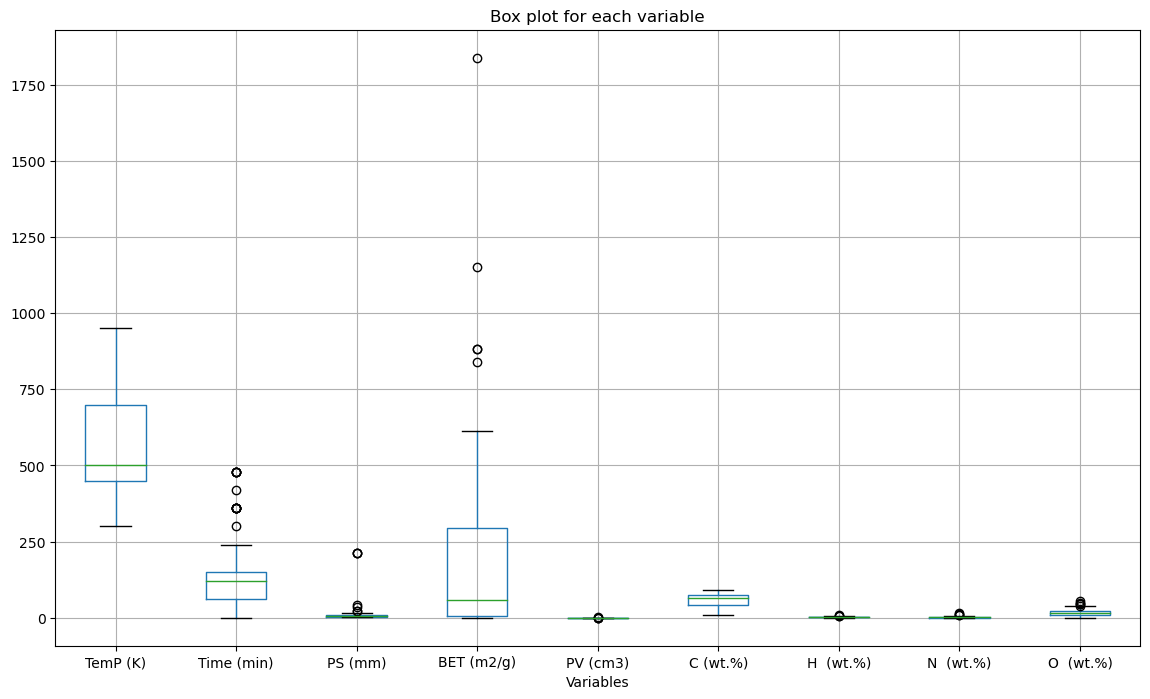

In [7]:
plt.figure(figsize = (14, 8))
df.boxplot(column=['TemP (K)', 'Time (min)', 'PS (mm)', 'BET (m2/g)', 'PV (cm3)',
       'C (wt.%)', 'H  (wt.%)', 'N  (wt.%)', 'O  (wt.%)'])
plt.xlabel('Variables')
plt.title('Box plot for each variable')
plt.show()


In [8]:
df = df[df['PS (mm)']< 200]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 85
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP          83 non-null     object 
 1   TemP (K)    83 non-null     int64  
 2   Time (min)  83 non-null     float64
 3   PS (mm)     83 non-null     float64
 4   BET (m2/g)  83 non-null     float64
 5   PV (cm3)    83 non-null     float64
 6   C (wt.%)    83 non-null     float64
 7   H  (wt.%)   83 non-null     float64
 8   N  (wt.%)   83 non-null     float64
 9   O  (wt.%)   83 non-null     float64
 10  Qm (mg/g)   83 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.8+ KB


## 3. Heat Map
#### In this section, we try to make a heatmap for the input variables, to locate the important features

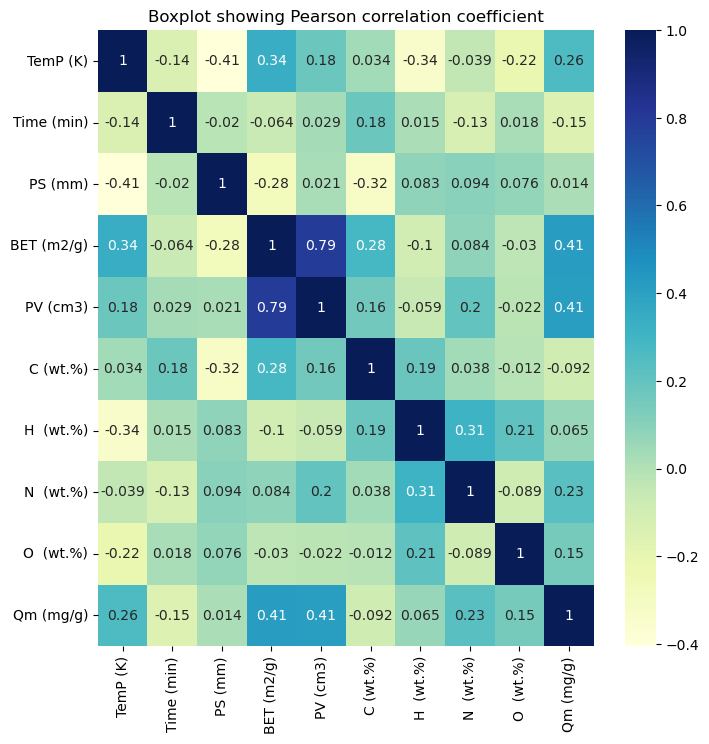

In [10]:
features = df.iloc[:, 1:11]
plt.figure(figsize = (8, 8))
dataplot = sns.heatmap(features.corr(), cmap="YlGnBu", annot=True) 
plt.title('Boxplot showing Pearson correlation coefficient')
plt.show()

There is a high correlation between PV and BET, so we may want to keep one of the to train the mdoel. Besides, C, H and PS have low correlations with Qm. We can run the model with and without these variables to compare the results.

## 4. One hot Encoding
#### In this part, we transformed the categorical column, Types of pharmaceuticals, into numerical values for machine learning tasks.

In [11]:
categorical_columns = ["TP"]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df = df_encoded.drop(categorical_columns, axis=1)
#df= df.dropna(axis=0)
df.head()


,TemP (K),Time (min),PS (mm),BET (m2/g),PV (cm3),C (wt.%),H (wt.%),N (wt.%),O (wt.%),Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315.0,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,600.0,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,800.0,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,800.0,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,800.0,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 81
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TemP (K)             83 non-null     float64
 1   Time (min)           83 non-null     float64
 2   PS (mm)              83 non-null     float64
 3   BET (m2/g)           83 non-null     float64
 4   PV (cm3)             83 non-null     float64
 5   C (wt.%)             83 non-null     float64
 6   H  (wt.%)            83 non-null     float64
 7   N  (wt.%)            83 non-null     float64
 8   O  (wt.%)            83 non-null     float64
 9   Qm (mg/g)            83 non-null     float64
 10  TP_Benzocaine        83 non-null     float64
 11  TP_Ciprofloxacin     83 non-null     float64
 12  TP_Citalopram        83 non-null     float64
 13  TP_Diclofenac        83 non-null     float64
 14  TP_Dimetridazole     83 non-null     float64
 15  TP_Floxentine        83 non-null     float64
 1

In [13]:
df.to_excel('updated_DATASET.xlsx', index=False)